In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
data=load_wine()
data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [15]:
df_wine=pd.DataFrame(data['data'],columns=data['feature_names'])
df_cwine=df_wine.copy()
df_wine['wine_class']=data['target']
#df_wine['wine_class_names']=pd.Categorical.from_codes(data.target, data.target_names)
df_wine['wine_class_names']=df_wine.wine_class.replace(dict(enumerate(data.target_names)))
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,wine_class_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [16]:
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'wine_class',
       'wine_class_names'],
      dtype='object')

In [17]:
df_wine.describe

<bound method NDFrame.describe of      alcohol  malic_acid   ash  ...  proline  wine_class  wine_class_names
0      14.23        1.71  2.43  ...   1065.0           0           class_0
1      13.20        1.78  2.14  ...   1050.0           0           class_0
2      13.16        2.36  2.67  ...   1185.0           0           class_0
3      14.37        1.95  2.50  ...   1480.0           0           class_0
4      13.24        2.59  2.87  ...    735.0           0           class_0
..       ...         ...   ...  ...      ...         ...               ...
173    13.71        5.65  2.45  ...    740.0           2           class_2
174    13.40        3.91  2.48  ...    750.0           2           class_2
175    13.27        4.28  2.26  ...    835.0           2           class_2
176    13.17        2.59  2.37  ...    840.0           2           class_2
177    14.13        4.10  2.74  ...    560.0           2           class_2

[178 rows x 15 columns]>

In [18]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [19]:
lmedian=[]
for i in df_cwine.columns.values:
  lmedian.append(np.median(df_cwine[i]))
lmedian

[13.05,
 1.8650000000000002,
 2.36,
 19.5,
 98.0,
 2.355,
 2.135,
 0.34,
 1.5550000000000002,
 4.6899999999999995,
 0.965,
 2.78,
 673.5]

In [20]:
df_cwine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


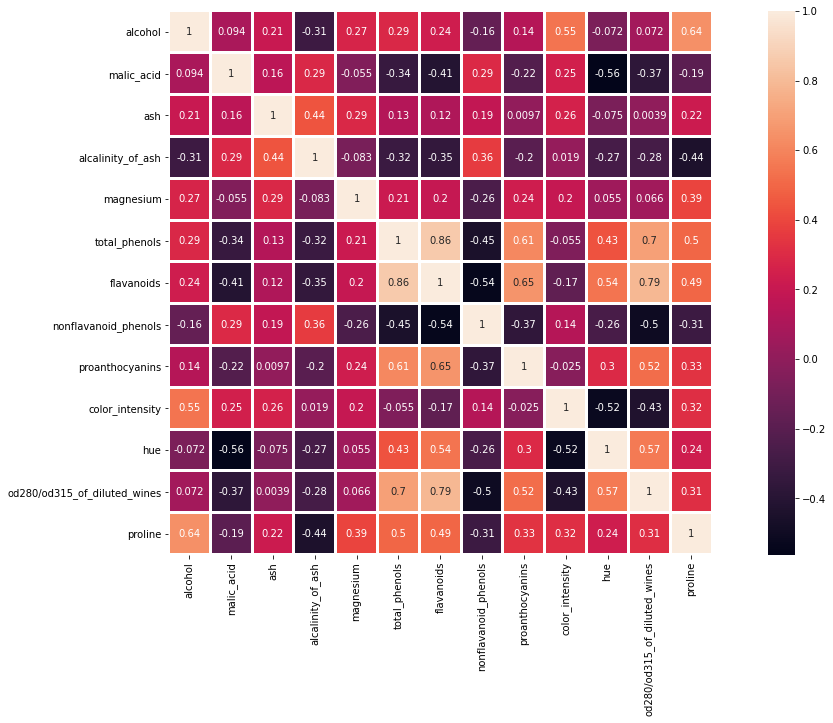

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_wine.iloc[:,:13].corr(),annot=True, linewidths=2, square=True)

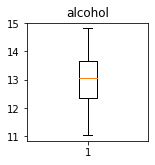

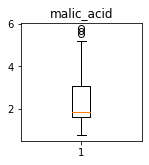

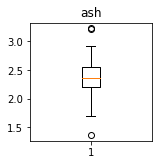

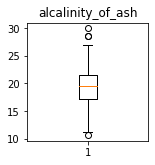

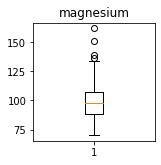

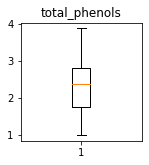

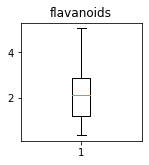

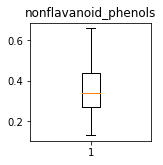

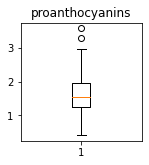

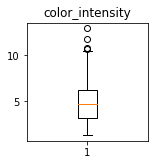

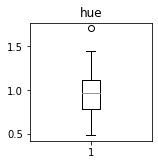

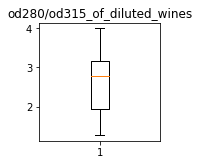

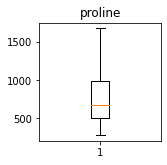

In [23]:
for i, column in enumerate(df_cwine.columns.values,1):
  plt.figure(figsize=(10,10))
  plt.subplot(4,4,i)
  plt.boxplot(df_cwine[column])
  plt.title(column)

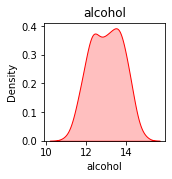

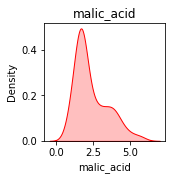

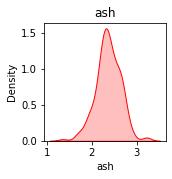

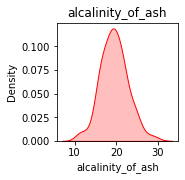

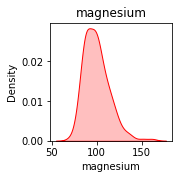

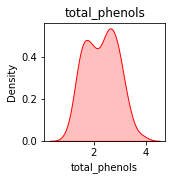

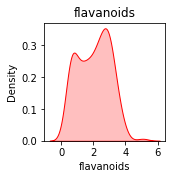

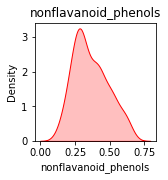

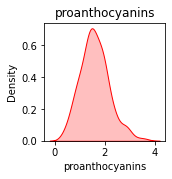

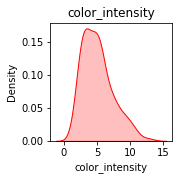

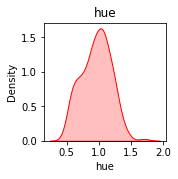

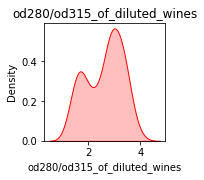

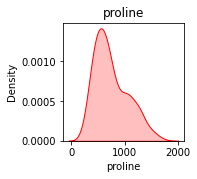

In [24]:
for i, column in enumerate(df_cwine.columns.values,1):
  plt.figure(figsize=(10,10))
  plt.subplot(4,4,i)
  sns.kdeplot(df_cwine[column],color='r',shade=True)
  plt.title(column)

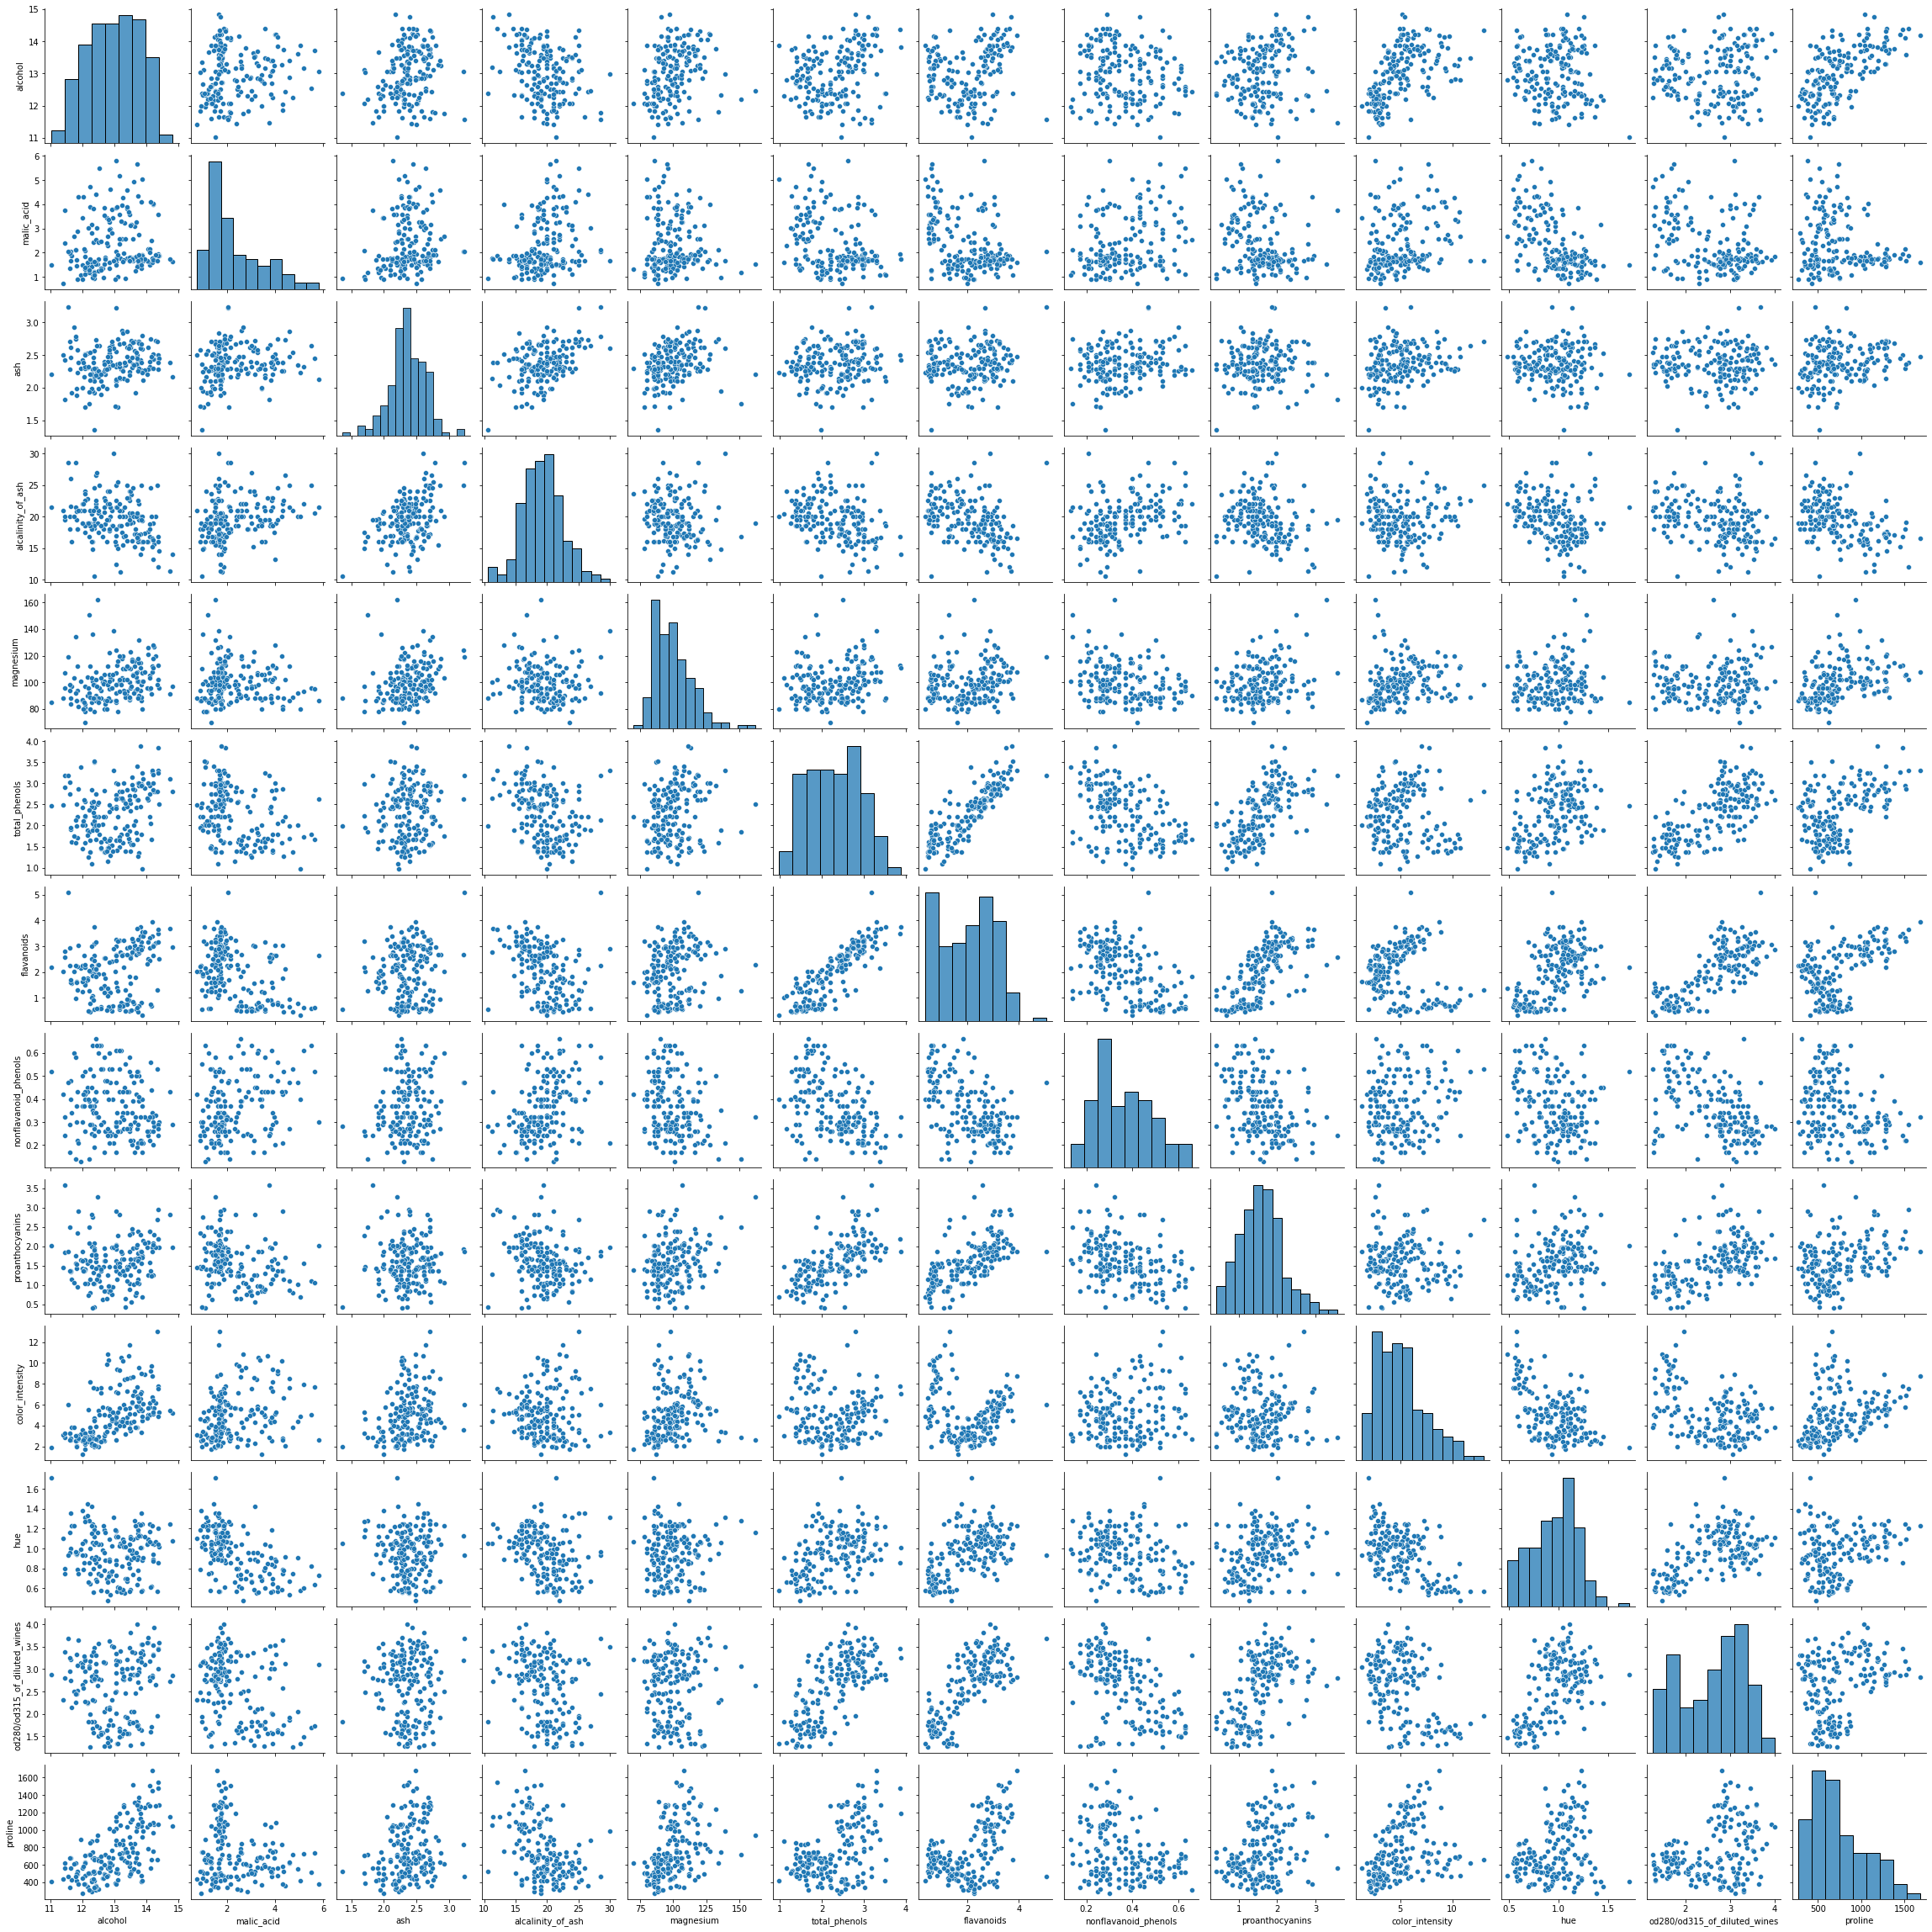

In [25]:
sns.pairplot(df_cwine)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df_wine.iloc[:,1:13],df_wine.iloc[:,13],test_size=0.3,random_state=31)

In [37]:
x_train.shape,y_train.shape

((124, 12), (124,))

In [38]:
x_test.shape,y_test.shape

((54, 12), (54,))

In [39]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [42]:
train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,test_pred)

In [43]:
train_acc,test_acc

(1.0, 0.8703703703703703)

[Text(279.0, 498.3, 'X[11] <= 755.0\ngini = 0.656\nsamples = 124\nvalue = [42, 50, 32]'),
 Text(139.5, 407.70000000000005, 'X[5] <= 1.025\ngini = 0.475\nsamples = 76\nvalue = [1, 48, 27]'),
 Text(69.75, 317.1, 'X[8] <= 2.9\ngini = 0.08\nsamples = 24\nvalue = [0, 1, 23]'),
 Text(34.875, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(104.625, 226.5, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]'),
 Text(209.25, 317.1, 'X[9] <= 0.65\ngini = 0.177\nsamples = 52\nvalue = [1, 47, 4]'),
 Text(174.375, 226.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(244.125, 226.5, 'X[11] <= 726.5\ngini = 0.041\nsamples = 48\nvalue = [1, 47, 0]'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(279.0, 135.89999999999998, 'X[11] <= 742.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(244.125, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(313.875, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 

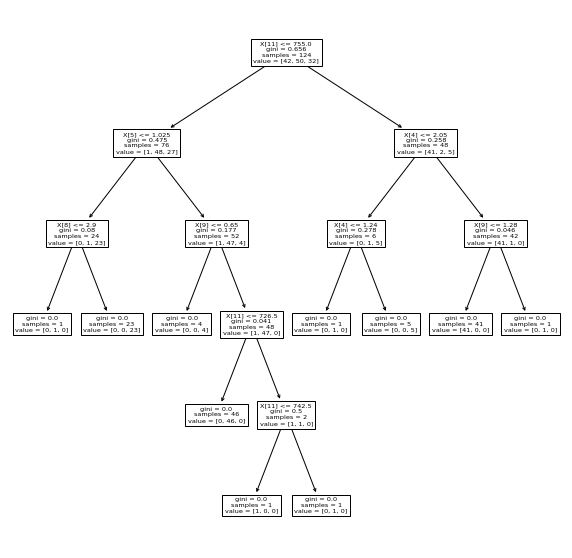

In [51]:
plt.figure(figsize=(10,10))
plot_tree(model)

In [48]:
param={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8]}
model_cv=GridSearchCV(model,param_grid=param)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [49]:
model_cv.best_score_

0.9436666666666665

In [50]:
model_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')